In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.10 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [11]:
''' initalizing the default values '''
w = np.zeros_like(X_train[0])
b = 0
eta0 = 0.0001
alpha = 0.0001
N = len(X_train)

In [12]:
 len(w), w

(15, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [13]:
# write your code to implement SGD as per the above instructions
# please choose the number of iternations on your own

In [14]:
import math
''' Function for calculating loss'''
def compute_log_loss(ground_truth ,model_predection):
    # intitalising the variables, for calculating sum
    total = 0
    
    for item in zip(ground_truth ,model_predection):
        ''' Applying the formula '''
#         print(item)
        total += ( ( item[0]*math.log(item[1],10) ) + ((1.0-item[0])*math.log(1.0-item[1],10)) )
    return (-1)*(1.0/len(ground_truth))*(total)


In [15]:
''' sigmod function '''
def sigmoid(w,X,b):
#     print(w.shape, X.shape)
    z = np.dot(X, w)+b
    return 1/(1+np.exp(-z))

In [16]:
''' Model for predictions '''
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        predict.append(sigmoid(w, X[i], b))
    return np.array(predict)

In [17]:

from tqdm import tqdm
import random

'''  intintializing the values '''
total_records = len(X_train)
train_loss_list = []
test_loss_list  = []
reducing_weights = [w]
reducing_bais    = [b]
''' Looping through each epoch '''
for each_point in tqdm(range(0, 70)):
    ''' Iterating for each batch '''
    for each_batch in range(0, total_records):
        ''' Getting random index '''
        get_random_input =each_batch
        ''' calculating the error '''
        error = y_train[get_random_input] - sigmoid(w.T,X_train[get_random_input],b)
        ''' Update weight vector '''
        w = (1- ((alpha*eta0)/total_records))*w + (alpha*X_train[get_random_input]*
                                                   (error))
        ''' update intercept'''
        b = (b+ alpha*(y_train[get_random_input] - sigmoid(w.T,X_train[get_random_input],b)))
    ''' stroing the optimized weigths and bais for each epoch'''
    reducing_weights.append(w)
    reducing_bais.append(b)
    print('current weight is')
    print(w)
    print('current bias is {}'.format(b))
    ''' calculate model predection on train data  '''
    get_train_prediction = pred(w.T,b, X_train)
    ''' calculate train loss '''
    get_train_loss = compute_log_loss(y_train ,get_train_prediction)
    train_loss_list.append(get_train_loss)
    print(' training error is {} for {} record in train dataset'.format(get_train_loss,get_random_input))
    ''' calculate model predection on test data  '''
    get_train_prediction = pred(w.T,b, X_test)
    ''' calculate test loss '''
    get_train_loss = compute_log_loss(y_test ,get_train_prediction)
    test_loss_list.append(get_train_loss)
    print(' test error is {} for {} record in test dataset'.format(get_train_loss,get_random_input))
        
        

  0%|          | 0/70 [00:00<?, ?it/s]

current weight is
[-0.2678707   0.12521946 -0.0449365   0.25699328 -0.02683356  0.38010378
 -0.39559008 -0.09734075  0.1358834   0.06412503  0.10842076  0.03008377
 -0.00996325  0.27432722  0.02323989]
current bias is -0.31459274390122616
 training error is 0.17546926223702455 for 37499 record in train dataset


  1%|▏         | 1/70 [00:02<02:54,  2.53s/it]

 test error is 0.17596687861916202 for 37499 record in test dataset
current weight is
[-0.33449107  0.15763792 -0.08872853  0.30764261 -0.09240136  0.46954509
 -0.43846016 -0.10285442  0.16938704  0.10894921  0.14621215  0.02481835
 -0.03750694  0.3178868   0.01974299]
current bias is -0.4709450275808126
 training error is 0.1686817443654028 for 37499 record in train dataset


  3%|▎         | 2/70 [00:04<02:47,  2.46s/it]

 test error is 0.16940989611779506 for 37499 record in test dataset
current weight is
[-0.36809102  0.1715249  -0.1127206   0.32544734 -0.1346053   0.51100775
 -0.44609127 -0.10173028  0.18708703  0.13278339  0.16506264  0.01929227
 -0.05164829  0.33065519  0.01918252]
current bias is -0.5798244820415148
 training error is 0.16639953379688424 for 37499 record in train dataset


  4%|▍         | 3/70 [00:07<02:41,  2.42s/it]

 test error is 0.1672141530442443 for 37499 record in test dataset
current weight is
[-0.38763204  0.17888717 -0.12620237  0.33270313 -0.16135369  0.53299782
 -0.44703842 -0.09943364  0.19773028  0.14644608  0.17589248  0.01467181
 -0.0603114   0.33524294  0.01949658]
current bias is -0.659155130477768
 training error is 0.16537404901928238 for 37499 record in train dataset


  6%|▌         | 4/70 [00:09<02:33,  2.32s/it]

 test error is 0.16622329469756617 for 37499 record in test dataset
current weight is
[-0.39996454  0.18327424 -0.13401962  0.33583383 -0.17880478  0.54557634
 -0.44670971 -0.09727012  0.20461796  0.15483246  0.18266666  0.01102903
 -0.0660834   0.33711584  0.0200539 ]
current bias is -0.7177711262848345
 training error is 0.16486122004082648 for 37499 record in train dataset


  7%|▋         | 5/70 [00:11<02:29,  2.29s/it]

 test error is 0.16572403546384057 for 37499 record in test dataset
current weight is
[-0.40819512  0.18608803 -0.13873193  0.33720386 -0.19058573  0.55321631
 -0.44625706 -0.09550674  0.20929646  0.16027648  0.18715532  0.00822064
 -0.0701101   0.33795986  0.0206259 ]
current bias is -0.7613483856830057
 training error is 0.1645911450630783 for 37499 record in train dataset


  9%|▊         | 6/70 [00:13<02:24,  2.26s/it]

 test error is 0.16545876819806618 for 37499 record in test dataset
current weight is
[-0.41391004  0.18798617 -0.14169517  0.33779395 -0.19878163  0.55810475
 -0.44590087 -0.09413778  0.21258307  0.16396875  0.19025299  0.00607829
 -0.0729975   0.33837632  0.02113129]
current bias is -0.7938619893892721
 training error is 0.16444479874475684 for 37499 record in train dataset


 10%|█         | 7/70 [00:16<02:27,  2.35s/it]

 test error is 0.1653136522207702 for 37499 record in test dataset
current weight is
[-0.41799064  0.18931327 -0.14363685  0.338036   -0.20462072  0.56137485
 -0.44565387 -0.09309556  0.21494694  0.16655711  0.19245324  0.00445306
 -0.07510418  0.33860217  0.02154898]
current bias is -0.8181828420460676


 11%|█▏        | 8/70 [00:18<02:21,  2.28s/it]

 training error is 0.16436411522525887 for 37499 record in train dataset
 test error is 0.1652328356455146 for 37499 record in test dataset
current weight is
[-0.42096142  0.190265   -0.14495661  0.33812517 -0.2088554   0.56364274
 -0.44549015 -0.09230872  0.21667522  0.16841596  0.19404807  0.00322381
 -0.07665874  0.33873738  0.0218821 ]
current bias is -0.8364117186199179


 13%|█▎        | 9/70 [00:20<02:19,  2.29s/it]

 training error is 0.1643191231082832 for 37499 record in train dataset
 test error is 0.1651872786451104 for 37499 record in test dataset
current weight is
[-0.42315311  0.19095979 -0.14588118  0.33814991 -0.21196623  0.56525978
 -0.44538357 -0.09171679  0.21795314  0.16977398  0.19522044  0.00229554
 -0.07781461  0.33882618  0.02214234]
current bias is -0.8500967712837226


 14%|█▍        | 10/70 [00:22<02:15,  2.26s/it]

 training error is 0.1642938291559788 for 37499 record in train dataset
 test error is 0.16516136116063082 for 37499 record in test dataset
current weight is
[-0.42478454  0.19147327 -0.14654424  0.33814971 -0.21427234  0.56643631
 -0.44531465 -0.09127206  0.21890535  0.17077798  0.19609061  0.00159509
 -0.07867848  0.33888899  0.02234309]
current bias is -0.860384347621053
 training error is 0.16427952013540809 for 37499 record in train dataset


 16%|█▌        | 11/70 [00:25<02:25,  2.46s/it]

 test error is 0.1651465026534052 for 37499 record in test dataset
current weight is
[-0.42600612  0.19185592 -0.14702807  0.33814159 -0.21599274  0.56730455
 -0.44527011 -0.090938    0.21961854  0.17152628  0.19674069  0.0010667
 -0.07932641  0.33893568  0.02249674]
current bias is -0.8681264033168422


 17%|█▋        | 12/70 [00:27<02:18,  2.39s/it]

 training error is 0.16427138331585123 for 37499 record in train dataset
 test error is 0.16513792321047302 for 37499 record in test dataset
current weight is
[-0.42692436  0.19214267 -0.14738547  0.33813238 -0.2172818   0.56795146
 -0.44524125 -0.09068697  0.22015454  0.17208701  0.19722848  0.00066811
 -0.07981354  0.33897141  0.02261375]
current bias is -0.8739580237448525
 training error is 0.16426673469647687 for 37499 record in train dataset


 19%|█▊        | 13/70 [00:30<02:18,  2.42s/it]

 test error is 0.16513293346948316 for 37499 record in test dataset
current weight is
[-4.27616303e-01  1.92358316e-01 -1.47651744e-01  3.38124448e-01
 -2.18250557e-01  5.68436504e-01 -4.45222439e-01 -9.04982276e-02
  2.20558299e-01  1.72508692e-01  1.97595545e-01  3.67389682e-04
 -8.01804159e-02  3.38999148e-01  2.27025856e-02]
current bias is -0.878353833823222


 20%|██        | 14/70 [00:32<02:14,  2.40s/it]

 training error is 0.1642640668101494 for 37499 record in train dataset
 test error is 0.16513000875646822 for 37499 record in test dataset
current weight is
[-4.28138526e-01  1.92520875e-01 -1.47851248e-01  3.38118324e-01
 -2.18980062e-01  5.68801644e-01 -4.45210076e-01 -9.03562109e-02
  2.20862881e-01  1.72826524e-01  1.97872282e-01  1.40463403e-04
 -8.04570342e-02  3.39020779e-01  2.27698921e-02]
current bias is -0.8816692980527855
 training error is 0.16426252835732985 for 37499 record in train dataset


 21%|██▏       | 15/70 [00:35<02:13,  2.43s/it]

 test error is 0.16512827929561433 for 37499 record in test dataset
current weight is
[-4.28533036e-01  1.92643593e-01 -1.48001286e-01  3.38113848e-01
 -2.19530153e-01  5.69077199e-01 -4.45201873e-01 -9.02492808e-02
  2.21092865e-01  1.73066429e-01  1.98081170e-01 -3.08167383e-05
 -8.06657705e-02  3.39037649e-01  2.28208263e-02]
current bias is -0.8841711124069901


 23%|██▎       | 16/70 [00:37<02:07,  2.37s/it]

 training error is 0.16426163646238537 for 37499 record in train dataset
 test error is 0.16512724616938715 for 37499 record in test dataset
current weight is
[-4.28831233e-01  1.92736316e-01 -1.48114394e-01  3.38110676e-01
 -2.19945331e-01  5.69285453e-01 -4.45196367e-01 -9.01687170e-02
  2.21266624e-01  1.73247674e-01  1.98238961e-01 -1.60125559e-04
 -8.08233708e-02  3.39050772e-01  2.28593424e-02]
current bias is -0.8860596678436906
 training error is 0.16426111618838604 for 37499 record in train dataset


 24%|██▍       | 17/70 [00:40<02:09,  2.44s/it]

 test error is 0.16512662167682646 for 37499 record in test dataset
current weight is
[-4.29056700e-01  1.92806410e-01 -1.48199790e-01  3.38108466e-01
 -2.20258873e-01  5.69442969e-01 -4.45192628e-01 -9.01079832e-02
  2.21397950e-01  1.73384672e-01  1.98358210e-01 -2.57768513e-04
 -8.09424082e-02  3.39060944e-01  2.28884558e-02]
current bias is -0.8874857174993432
 training error is 0.1642608104485638 for 37499 record in train dataset


 26%|██▌       | 18/70 [00:43<02:21,  2.72s/it]

 test error is 0.16512623900834014 for 37499 record in test dataset
current weight is
[-4.29227202e-01  1.92859414e-01 -1.48264320e-01  3.38106939e-01
 -2.20495751e-01  5.69562156e-01 -4.45190055e-01 -9.00621757e-02
  2.21497225e-01  1.73488254e-01  1.98448354e-01 -3.31513941e-04
 -8.10323422e-02  3.39068801e-01  2.29104570e-02]
current bias is -0.8885627842328183


 27%|██▋       | 19/70 [00:46<02:24,  2.84s/it]

 training error is 0.1642606291821092 for 37499 record in train dataset
 test error is 0.16512600086609056 for 37499 record in test dataset
current weight is
[-4.29356145e-01  1.92899498e-01 -1.48313108e-01  3.38105887e-01
 -2.20674756e-01  5.69652354e-01 -4.45188264e-01 -9.00276114e-02
  2.21572280e-01  1.73566584e-01  1.98516506e-01 -3.87219641e-04
 -8.11003006e-02  3.39074847e-01  2.29270817e-02]
current bias is -0.8893764233134068


 29%|██▊       | 20/70 [00:48<02:09,  2.59s/it]

 training error is 0.16426052056735924 for 37499 record in train dataset
 test error is 0.16512585010563702 for 37499 record in test dataset
current weight is
[-4.29453659e-01  1.92929814e-01 -1.48350004e-01  3.38105161e-01
 -2.20810049e-01  5.69720614e-01 -4.45187001e-01 -9.00015216e-02
  2.21629026e-01  1.73625819e-01  1.98568036e-01 -4.29304289e-04
 -8.11516596e-02  3.39079485e-01  2.29396434e-02]
current bias is -0.8899911538531141


 30%|███       | 21/70 [00:50<01:58,  2.42s/it]

 training error is 0.1642604546634997 for 37499 record in train dataset
 test error is 0.16512575289221296 for 37499 record in test dataset
current weight is
[-4.29527403e-01  1.92952741e-01 -1.48377910e-01  3.38104657e-01
 -2.20912313e-01  5.69772268e-01 -4.45186101e-01 -8.99818228e-02
  2.21671931e-01  1.73670615e-01  1.98606998e-01 -4.61102109e-04
 -8.11904768e-02  3.39083034e-01  2.29491352e-02]
current bias is -0.8904556560178001


 31%|███▏      | 22/70 [00:52<01:49,  2.29s/it]

 training error is 0.16426041408844078 for 37499 record in train dataset
 test error is 0.1651256889988201 for 37499 record in test dataset
current weight is
[-4.29583167e-01  1.92970079e-01 -1.48399017e-01  3.38104306e-01
 -2.20989617e-01  5.69811351e-01 -4.45185453e-01 -8.99669458e-02
  2.21704370e-01  1.73704490e-01  1.98636457e-01 -4.85129786e-04
 -8.12198167e-02  3.39085743e-01  2.29563076e-02]
current bias is -0.8908066742845895
 training error is 0.16426038869248608 for 37499 record in train dataset


 33%|███▎      | 23/70 [00:54<01:44,  2.22s/it]

 test error is 0.16512564619491912 for 37499 record in test dataset
current weight is
[-4.29625335e-01  1.92983191e-01 -1.48414981e-01  3.38104059e-01
 -2.21048054e-01  5.69840919e-01 -4.45184982e-01 -8.99557082e-02
  2.21728896e-01  1.73730106e-01  1.98658731e-01 -5.03287430e-04
 -8.12419940e-02  3.39087807e-01  2.29617276e-02]
current bias is -0.8910719528105682
 training error is 0.16426037250710632 for 37499 record in train dataset


 34%|███▍      | 24/70 [00:56<01:38,  2.13s/it]

 test error is 0.1651256169861396 for 37499 record in test dataset
current weight is
[-4.29657219e-01  1.92993106e-01 -1.48427055e-01  3.38103883e-01
 -2.21092230e-01  5.69863286e-01 -4.45184638e-01 -8.99472184e-02
  2.21747438e-01  1.73749475e-01  1.98675572e-01 -5.17009955e-04
 -8.12587576e-02  3.39089377e-01  2.29658236e-02]
current bias is -0.8912724453007421


 36%|███▌      | 25/70 [00:58<01:34,  2.11s/it]

 training error is 0.16426036199220245 for 37499 record in train dataset
 test error is 0.16512559670985227 for 37499 record in test dataset
current weight is
[-4.29681326e-01  1.93000603e-01 -1.48436186e-01  3.38103758e-01
 -2.21125625e-01  5.69880203e-01 -4.45184384e-01 -8.99408037e-02
  2.21761457e-01  1.73764121e-01  1.98688304e-01 -5.27381181e-04
 -8.12714293e-02  3.39090570e-01  2.29689190e-02]
current bias is -0.8914239801297006


 37%|███▋      | 26/70 [01:00<01:30,  2.05s/it]

 training error is 0.16426035502610167 for 37499 record in train dataset
 test error is 0.16512558241566175 for 37499 record in test dataset
current weight is
[-4.29699552e-01  1.93006271e-01 -1.48443090e-01  3.38103668e-01
 -2.21150870e-01  5.69892997e-01 -4.45184196e-01 -8.99359564e-02
  2.21772055e-01  1.73775194e-01  1.98697930e-01 -5.35219870e-04
 -8.12810080e-02  3.39091475e-01  2.29712585e-02]
current bias is -0.89153851586812


 39%|███▊      | 27/70 [01:02<01:29,  2.07s/it]

 training error is 0.16426035032139968 for 37499 record in train dataset
 test error is 0.16512557220222532 for 37499 record in test dataset
current weight is
[-4.29713332e-01  1.93010557e-01 -1.48448311e-01  3.38103602e-01
 -2.21169954e-01  5.69902673e-01 -4.45184056e-01 -8.99322933e-02
  2.21780067e-01  1.73783566e-01  1.98705208e-01 -5.41144624e-04
 -8.12882487e-02  3.39092162e-01  2.29730267e-02]
current bias is -0.8916250884879592


 40%|████      | 28/70 [01:04<01:29,  2.12s/it]

 training error is 0.16426034708556325 for 37499 record in train dataset
 test error is 0.1651255648207193 for 37499 record in test dataset
current weight is
[-4.29723750e-01  1.93013797e-01 -1.48452259e-01  3.38103554e-01
 -2.21184381e-01  5.69909988e-01 -4.45183952e-01 -8.99295249e-02
  2.21786124e-01  1.73789895e-01  1.98710710e-01 -5.45622872e-04
 -8.12937221e-02  3.39092682e-01  2.29743631e-02]
current bias is -0.8916905262714768


 41%|████▏     | 29/70 [01:07<01:30,  2.21s/it]

 training error is 0.16426034482265447 for 37499 record in train dataset
 test error is 0.16512555943510038 for 37499 record in test dataset
current weight is
[-4.29731626e-01  1.93016247e-01 -1.48455244e-01  3.38103518e-01
 -2.21195287e-01  5.69915520e-01 -4.45183874e-01 -8.99274325e-02
  2.21790703e-01  1.73794680e-01  1.98714869e-01 -5.49007838e-04
 -8.12978595e-02  3.39093076e-01  2.29753732e-02]
current bias is -0.8917399895774835


 43%|████▎     | 30/70 [01:09<01:26,  2.17s/it]

 training error is 0.16426034321669825 for 37499 record in train dataset
 test error is 0.16512555547524244 for 37499 record in test dataset
current weight is
[-4.29737580e-01  1.93018098e-01 -1.48457500e-01  3.38103492e-01
 -2.21203531e-01  5.69919703e-01 -4.45183816e-01 -8.99258511e-02
  2.21794165e-01  1.73798298e-01  1.98718013e-01 -5.51566466e-04
 -8.13009871e-02  3.39093374e-01  2.29761367e-02]
current bias is -0.8917773784815544


 44%|████▍     | 31/70 [01:11<01:23,  2.14s/it]

 training error is 0.16426034206250428 for 37499 record in train dataset
 test error is 0.16512555254561762 for 37499 record in test dataset
current weight is
[-4.29742081e-01  1.93019498e-01 -1.48459207e-01  3.38103473e-01
 -2.21209763e-01  5.69922865e-01 -4.45183772e-01 -8.99246557e-02
  2.21796782e-01  1.73801032e-01  1.98720390e-01 -5.53500505e-04
 -8.13033513e-02  3.39093600e-01  2.29767138e-02]
current bias is -0.8918056406971244
 training error is 0.1642603412241775 for 37499 record in train dataset


 46%|████▌     | 32/70 [01:13<01:22,  2.16s/it]

 test error is 0.16512555036754306 for 37499 record in test dataset
current weight is
[-4.29745483e-01  1.93020557e-01 -1.48460496e-01  3.38103458e-01
 -2.21214474e-01  5.69925255e-01 -4.45183739e-01 -8.99237522e-02
  2.21798760e-01  1.73803100e-01  1.98722187e-01 -5.54962439e-04
 -8.13051385e-02  3.39093771e-01  2.29771501e-02]
current bias is -0.8918270042091911


 47%|████▋     | 33/70 [01:16<01:21,  2.21s/it]

 training error is 0.16426034060998645 for 37499 record in train dataset
 test error is 0.1651255487419859 for 37499 record in test dataset
current weight is
[-4.29748056e-01  1.93021357e-01 -1.48461471e-01  3.38103447e-01
 -2.21218036e-01  5.69927062e-01 -4.45183714e-01 -8.99230693e-02
  2.21800255e-01  1.73804662e-01  1.98723545e-01 -5.56067516e-04
 -8.13064895e-02  3.39093900e-01  2.29774798e-02]
current bias is -0.8918431530510396
 training error is 0.16426034015685897 for 37499 record in train dataset


 49%|████▊     | 34/70 [01:18<01:18,  2.17s/it]

 test error is 0.16512554752515837 for 37499 record in test dataset
current weight is
[-4.29750000e-01  1.93021962e-01 -1.48462209e-01  3.38103439e-01
 -2.21220728e-01  5.69928429e-01 -4.45183695e-01 -8.99225531e-02
  2.21801385e-01  1.73805844e-01  1.98724572e-01 -5.56902851e-04
 -8.13075107e-02  3.39093997e-01  2.29777290e-02]
current bias is -0.8918553601331323
 training error is 0.16426033982070104 for 37499 record in train dataset


 50%|█████     | 35/70 [01:20<01:16,  2.19s/it]

 test error is 0.1651255466121836 for 37499 record in test dataset
current weight is
[-4.29751470e-01  1.93022419e-01 -1.48462766e-01  3.38103433e-01
 -2.21222763e-01  5.69929461e-01 -4.45183681e-01 -8.99221629e-02
  2.21802240e-01  1.73806737e-01  1.98725348e-01 -5.57534289e-04
 -8.13082826e-02  3.39094071e-01  2.29779174e-02]
current bias is -0.8918645876254531
 training error is 0.16426033957023356 for 37499 record in train dataset


 51%|█████▏    | 36/70 [01:22<01:16,  2.24s/it]

 test error is 0.16512554592596942 for 37499 record in test dataset
current weight is
[-4.29752581e-01  1.93022764e-01 -1.48463187e-01  3.38103429e-01
 -2.21224301e-01  5.69930242e-01 -4.45183670e-01 -8.99218679e-02
  2.21802886e-01  1.73807412e-01  1.98725935e-01 -5.58011600e-04
 -8.13088662e-02  3.39094127e-01  2.29780599e-02]
current bias is -0.8918715628235859
 training error is 0.16426033938297835 for 37499 record in train dataset


 53%|█████▎    | 37/70 [01:25<01:15,  2.28s/it]

 test error is 0.16512554540949104 for 37499 record in test dataset
current weight is
[-4.29753421e-01  1.93023026e-01 -1.48463506e-01  3.38103425e-01
 -2.21225464e-01  5.69930832e-01 -4.45183662e-01 -8.99216449e-02
  2.21803374e-01  1.73807922e-01  1.98726378e-01 -5.58372407e-04
 -8.13093073e-02  3.39094169e-01  2.29781675e-02]
current bias is -0.8918768354887339


 54%|█████▍    | 38/70 [01:27<01:15,  2.35s/it]

 training error is 0.1642603392426212 for 37499 record in train dataset
 test error is 0.16512554502035892 for 37499 record in test dataset
current weight is
[-4.29754056e-01  1.93023223e-01 -1.48463746e-01  3.38103423e-01
 -2.21226343e-01  5.69931279e-01 -4.45183656e-01 -8.99214764e-02
  2.21803743e-01  1.73808308e-01  1.98726713e-01 -5.58645146e-04
 -8.13096408e-02  3.39094201e-01  2.29782489e-02]
current bias is -0.8918808211871662


 56%|█████▌    | 39/70 [01:29<01:09,  2.26s/it]

 training error is 0.16426033913719873 for 37499 record in train dataset
 test error is 0.16512554472694171 for 37499 record in test dataset
current weight is
[-4.29754536e-01  1.93023373e-01 -1.48463928e-01  3.38103421e-01
 -2.21227007e-01  5.69931616e-01 -4.45183651e-01 -8.99213490e-02
  2.21804022e-01  1.73808600e-01  1.98726967e-01 -5.58851314e-04
 -8.13098928e-02  3.39094225e-01  2.29783104e-02]
current bias is -0.8918838340484826


 57%|█████▋    | 40/70 [01:31<01:06,  2.23s/it]

 training error is 0.16426033905789575 for 37499 record in train dataset
 test error is 0.1651255445055628 for 37499 record in test dataset
current weight is
[-4.29754899e-01  1.93023485e-01 -1.48464066e-01  3.38103419e-01
 -2.21227510e-01  5.69931871e-01 -4.45183648e-01 -8.99212527e-02
  2.21804233e-01  1.73808820e-01  1.98727158e-01 -5.59007160e-04
 -8.13100833e-02  3.39094244e-01  2.29783569e-02]
current bias is -0.8918861115265115
 training error is 0.16426033899817313 for 37499 record in train dataset


 59%|█████▊    | 41/70 [01:34<01:06,  2.30s/it]

 test error is 0.16512554433845952 for 37499 record in test dataset
current weight is
[-4.29755173e-01  1.93023571e-01 -1.48464170e-01  3.38103418e-01
 -2.21227889e-01  5.69932064e-01 -4.45183645e-01 -8.99211799e-02
  2.21804393e-01  1.73808987e-01  1.98727303e-01 -5.59124966e-04
 -8.13102274e-02  3.39094258e-01  2.29783921e-02]
current bias is -0.8918878331156846


 60%|██████    | 42/70 [01:36<01:04,  2.31s/it]

 training error is 0.16426033895315278 for 37499 record in train dataset
 test error is 0.16512554421227899 for 37499 record in test dataset
current weight is
[-4.29755380e-01  1.93023635e-01 -1.48464248e-01  3.38103417e-01
 -2.21228176e-01  5.69932209e-01 -4.45183643e-01 -8.99211249e-02
  2.21804513e-01  1.73809113e-01  1.98727413e-01 -5.59214019e-04
 -8.13103363e-02  3.39094268e-01  2.29784186e-02]
current bias is -0.8918891344984582
 training error is 0.16426033891919253 for 37499 record in train dataset


 61%|██████▏   | 43/70 [01:38<01:02,  2.31s/it]

 test error is 0.16512554411697636 for 37499 record in test dataset
current weight is
[-4.29755537e-01  1.93023684e-01 -1.48464308e-01  3.38103416e-01
 -2.21228393e-01  5.69932319e-01 -4.45183642e-01 -8.99210833e-02
  2.21804604e-01  1.73809208e-01  1.98727496e-01 -5.59281335e-04
 -8.13104186e-02  3.39094276e-01  2.29784387e-02]
current bias is -0.8918901182393744
 training error is 0.16426033889356528 for 37499 record in train dataset


 63%|██████▎   | 44/70 [01:41<01:01,  2.35s/it]

 test error is 0.16512554404498 for 37499 record in test dataset
current weight is
[-4.29755655e-01  1.93023721e-01 -1.48464353e-01  3.38103416e-01
 -2.21228557e-01  5.69932403e-01 -4.45183641e-01 -8.99210518e-02
  2.21804673e-01  1.73809280e-01  1.98727558e-01 -5.59332221e-04
 -8.13104808e-02  3.39094282e-01  2.29784539e-02]
current bias is -0.8918908618687542


 64%|██████▍   | 45/70 [01:43<00:59,  2.36s/it]

 training error is 0.16426033887421454 for 37499 record in train dataset
 test error is 0.16512554399058307 for 37499 record in test dataset
current weight is
[-4.29755745e-01  1.93023749e-01 -1.48464387e-01  3.38103416e-01
 -2.21228681e-01  5.69932466e-01 -4.45183640e-01 -8.99210281e-02
  2.21804725e-01  1.73809335e-01  1.98727605e-01 -5.59370687e-04
 -8.13105278e-02  3.39094286e-01  2.29784654e-02]
current bias is -0.8918914239931517


 66%|██████▌   | 46/70 [01:46<00:58,  2.44s/it]

 training error is 0.1642603388596005 for 37499 record in train dataset
 test error is 0.16512554394947776 for 37499 record in test dataset
current weight is
[-4.29755813e-01  1.93023770e-01 -1.48464412e-01  3.38103415e-01
 -2.21228775e-01  5.69932513e-01 -4.45183639e-01 -8.99210101e-02
  2.21804765e-01  1.73809376e-01  1.98727641e-01 -5.59399764e-04
 -8.13105633e-02  3.39094290e-01  2.29784740e-02]
current bias is -0.8918918489143556


 67%|██████▋   | 47/70 [01:48<00:54,  2.35s/it]

 training error is 0.16426033884856125 for 37499 record in train dataset
 test error is 0.16512554391841355 for 37499 record in test dataset
current weight is
[-4.29755864e-01  1.93023786e-01 -1.48464432e-01  3.38103415e-01
 -2.21228846e-01  5.69932549e-01 -4.45183639e-01 -8.99209965e-02
  2.21804794e-01  1.73809407e-01  1.98727668e-01 -5.59421743e-04
 -8.13105902e-02  3.39094292e-01  2.29784806e-02]
current bias is -0.8918921701209147


 69%|██████▊   | 48/70 [01:50<00:48,  2.22s/it]

 training error is 0.16426033884022054 for 37499 record in train dataset
 test error is 0.16512554389493533 for 37499 record in test dataset
current weight is
[-4.29755903e-01  1.93023798e-01 -1.48464446e-01  3.38103415e-01
 -2.21228900e-01  5.69932576e-01 -4.45183638e-01 -8.99209862e-02
  2.21804817e-01  1.73809430e-01  1.98727689e-01 -5.59438358e-04
 -8.13106105e-02  3.39094294e-01  2.29784856e-02]
current bias is -0.8918924129275009


 70%|███████   | 49/70 [01:52<00:44,  2.12s/it]

 training error is 0.16426033883392077 for 37499 record in train dataset
 test error is 0.16512554387719164 for 37499 record in test dataset
current weight is
[-4.29755932e-01  1.93023807e-01 -1.48464457e-01  3.38103415e-01
 -2.21228940e-01  5.69932597e-01 -4.45183638e-01 -8.99209785e-02
  2.21804834e-01  1.73809448e-01  1.98727704e-01 -5.59450918e-04
 -8.13106259e-02  3.39094296e-01  2.29784893e-02]
current bias is -0.8918925964699665
 training error is 0.16426033882915658 for 37499 record in train dataset


 71%|███████▏  | 50/70 [01:54<00:41,  2.07s/it]

 test error is 0.16512554386378106 for 37499 record in test dataset
current weight is
[-4.29755954e-01  1.93023814e-01 -1.48464466e-01  3.38103415e-01
 -2.21228971e-01  5.69932612e-01 -4.45183638e-01 -8.99209726e-02
  2.21804847e-01  1.73809461e-01  1.98727716e-01 -5.59460412e-04
 -8.13106375e-02  3.39094297e-01  2.29784921e-02]
current bias is -0.8918927352134758


 73%|███████▎  | 51/70 [01:56<00:38,  2.03s/it]

 training error is 0.1642603388255578 for 37499 record in train dataset
 test error is 0.16512554385364336 for 37499 record in test dataset
current weight is
[-4.29755971e-01  1.93023819e-01 -1.48464472e-01  3.38103415e-01
 -2.21228994e-01  5.69932624e-01 -4.45183638e-01 -8.99209682e-02
  2.21804856e-01  1.73809472e-01  1.98727724e-01 -5.59467589e-04
 -8.13106463e-02  3.39094298e-01  2.29784943e-02]
current bias is -0.8918928400925312


 74%|███████▍  | 52/70 [01:58<00:35,  1.97s/it]

 training error is 0.16426033882283855 for 37499 record in train dataset
 test error is 0.16512554384598138 for 37499 record in test dataset
current weight is
[-4.29755983e-01  1.93023823e-01 -1.48464477e-01  3.38103415e-01
 -2.21229011e-01  5.69932633e-01 -4.45183637e-01 -8.99209648e-02
  2.21804864e-01  1.73809479e-01  1.98727731e-01 -5.59473014e-04
 -8.13106529e-02  3.39094298e-01  2.29784959e-02]
current bias is -0.891892919372772


 76%|███████▌  | 53/70 [02:00<00:33,  1.96s/it]

 training error is 0.1642603388207819 for 37499 record in train dataset
 test error is 0.1651255438401887 for 37499 record in test dataset
current weight is
[-4.29755993e-01  1.93023826e-01 -1.48464481e-01  3.38103415e-01
 -2.21229024e-01  5.69932640e-01 -4.45183637e-01 -8.99209623e-02
  2.21804869e-01  1.73809485e-01  1.98727736e-01 -5.59477115e-04
 -8.13106579e-02  3.39094299e-01  2.29784971e-02]
current bias is -0.8918929793023364
 training error is 0.16426033881922866 for 37499 record in train dataset


 77%|███████▋  | 54/70 [02:01<00:31,  1.96s/it]

 test error is 0.16512554383581135 for 37499 record in test dataset
current weight is
[-4.29756000e-01  1.93023828e-01 -1.48464483e-01  3.38103415e-01
 -2.21229034e-01  5.69932645e-01 -4.45183637e-01 -8.99209604e-02
  2.21804873e-01  1.73809489e-01  1.98727740e-01 -5.59480215e-04
 -8.13106617e-02  3.39094299e-01  2.29784981e-02]
current bias is -0.8918930246043207


 79%|███████▊  | 55/70 [02:03<00:28,  1.91s/it]

 training error is 0.16426033881805266 for 37499 record in train dataset
 test error is 0.16512554383250266 for 37499 record in test dataset
current weight is
[-4.29756005e-01  1.93023830e-01 -1.48464485e-01  3.38103415e-01
 -2.21229042e-01  5.69932649e-01 -4.45183637e-01 -8.99209589e-02
  2.21804877e-01  1.73809493e-01  1.98727743e-01 -5.59482558e-04
 -8.13106646e-02  3.39094299e-01  2.29784988e-02]
current bias is -0.8918930588490338


 80%|████████  | 56/70 [02:05<00:26,  1.88s/it]

 training error is 0.16426033881716615 for 37499 record in train dataset
 test error is 0.1651255438300008 for 37499 record in test dataset
current weight is
[-4.29756010e-01  1.93023831e-01 -1.48464487e-01  3.38103415e-01
 -2.21229048e-01  5.69932652e-01 -4.45183637e-01 -8.99209578e-02
  2.21804879e-01  1.73809495e-01  1.98727745e-01 -5.59484329e-04
 -8.13106667e-02  3.39094300e-01  2.29784993e-02]
current bias is -0.8918930847353151


 81%|████████▏ | 57/70 [02:07<00:24,  1.86s/it]

 training error is 0.1642603388164946 for 37499 record in train dataset
 test error is 0.16512554382810932 for 37499 record in test dataset
current weight is
[-4.29756013e-01  1.93023832e-01 -1.48464488e-01  3.38103415e-01
 -2.21229052e-01  5.69932654e-01 -4.45183637e-01 -8.99209570e-02
  2.21804881e-01  1.73809497e-01  1.98727747e-01 -5.59485668e-04
 -8.13106684e-02  3.39094300e-01  2.29784997e-02]
current bias is -0.891893104303281


 83%|████████▎ | 58/70 [02:09<00:22,  1.86s/it]

 training error is 0.16426033881598764 for 37499 record in train dataset
 test error is 0.16512554382668013 for 37499 record in test dataset
current weight is
[-4.29756015e-01  1.93023833e-01 -1.48464489e-01  3.38103415e-01
 -2.21229055e-01  5.69932655e-01 -4.45183637e-01 -8.99209564e-02
  2.21804882e-01  1.73809499e-01  1.98727748e-01 -5.59486681e-04
 -8.13106696e-02  3.39094300e-01  2.29785000e-02]
current bias is -0.891893119095114


 84%|████████▍ | 59/70 [02:11<00:20,  1.86s/it]

 training error is 0.16426033881560353 for 37499 record in train dataset
 test error is 0.16512554382560016 for 37499 record in test dataset
current weight is
[-4.29756017e-01  1.93023833e-01 -1.48464490e-01  3.38103415e-01
 -2.21229058e-01  5.69932657e-01 -4.45183637e-01 -8.99209559e-02
  2.21804883e-01  1.73809500e-01  1.98727749e-01 -5.59487446e-04
 -8.13106706e-02  3.39094300e-01  2.29785002e-02]
current bias is -0.8918931302765681


 86%|████████▌ | 60/70 [02:12<00:18,  1.87s/it]

 training error is 0.16426033881531346 for 37499 record in train dataset
 test error is 0.16512554382478273 for 37499 record in test dataset
current weight is
[-4.29756018e-01  1.93023834e-01 -1.48464490e-01  3.38103415e-01
 -2.21229060e-01  5.69932658e-01 -4.45183637e-01 -8.99209556e-02
  2.21804884e-01  1.73809500e-01  1.98727750e-01 -5.59488024e-04
 -8.13106713e-02  3.39094300e-01  2.29785004e-02]
current bias is -0.8918931387288516


 87%|████████▋ | 61/70 [02:14<00:16,  1.86s/it]

 training error is 0.16426033881509533 for 37499 record in train dataset
 test error is 0.16512554382416447 for 37499 record in test dataset
current weight is
[-4.29756019e-01  1.93023834e-01 -1.48464491e-01  3.38103415e-01
 -2.21229061e-01  5.69932658e-01 -4.45183637e-01 -8.99209553e-02
  2.21804885e-01  1.73809501e-01  1.98727750e-01 -5.59488461e-04
 -8.13106718e-02  3.39094300e-01  2.29785005e-02]
current bias is -0.8918931451181027


 89%|████████▊ | 62/70 [02:16<00:15,  1.88s/it]

 training error is 0.16426033881492785 for 37499 record in train dataset
 test error is 0.16512554382369862 for 37499 record in test dataset
current weight is
[-4.29756020e-01  1.93023834e-01 -1.48464491e-01  3.38103415e-01
 -2.21229062e-01  5.69932659e-01 -4.45183637e-01 -8.99209551e-02
  2.21804885e-01  1.73809502e-01  1.98727751e-01 -5.59488792e-04
 -8.13106722e-02  3.39094300e-01  2.29785006e-02]
current bias is -0.8918931499478842


 90%|█████████ | 63/70 [02:18<00:13,  1.88s/it]

 training error is 0.16426033881480348 for 37499 record in train dataset
 test error is 0.16512554382334668 for 37499 record in test dataset
current weight is
[-4.29756021e-01  1.93023834e-01 -1.48464491e-01  3.38103415e-01
 -2.21229063e-01  5.69932659e-01 -4.45183637e-01 -8.99209549e-02
  2.21804885e-01  1.73809502e-01  1.98727751e-01 -5.59489042e-04
 -8.13106725e-02  3.39094300e-01  2.29785007e-02]
current bias is -0.891893153598805


 91%|█████████▏| 64/70 [02:20<00:11,  1.88s/it]

 training error is 0.16426033881470875 for 37499 record in train dataset
 test error is 0.16512554382308 for 37499 record in test dataset
current weight is
[-4.29756021e-01  1.93023834e-01 -1.48464491e-01  3.38103415e-01
 -2.21229064e-01  5.69932660e-01 -4.45183637e-01 -8.99209548e-02
  2.21804886e-01  1.73809502e-01  1.98727751e-01 -5.59489231e-04
 -8.13106727e-02  3.39094300e-01  2.29785007e-02]
current bias is -0.8918931563586091


 93%|█████████▎| 65/70 [02:22<00:09,  1.86s/it]

 training error is 0.16426033881463978 for 37499 record in train dataset
 test error is 0.16512554382287753 for 37499 record in test dataset
current weight is
[-4.29756021e-01  1.93023835e-01 -1.48464491e-01  3.38103415e-01
 -2.21229064e-01  5.69932660e-01 -4.45183637e-01 -8.99209547e-02
  2.21804886e-01  1.73809502e-01  1.98727751e-01 -5.59489373e-04
 -8.13106729e-02  3.39094300e-01  2.29785008e-02]
current bias is -0.8918931584448103


 94%|█████████▍| 66/70 [02:24<00:07,  1.88s/it]

 training error is 0.16426033881458382 for 37499 record in train dataset
 test error is 0.16512554382272598 for 37499 record in test dataset
current weight is
[-4.29756022e-01  1.93023835e-01 -1.48464492e-01  3.38103415e-01
 -2.21229064e-01  5.69932660e-01 -4.45183637e-01 -8.99209547e-02
  2.21804886e-01  1.73809503e-01  1.98727751e-01 -5.59489481e-04
 -8.13106730e-02  3.39094300e-01  2.29785008e-02]
current bias is -0.8918931600218077


 96%|█████████▌| 67/70 [02:26<00:05,  1.94s/it]

 training error is 0.1642603388145426 for 37499 record in train dataset
 test error is 0.16512554382260966 for 37499 record in test dataset
current weight is
[-4.29756022e-01  1.93023835e-01 -1.48464492e-01  3.38103415e-01
 -2.21229065e-01  5.69932660e-01 -4.45183637e-01 -8.99209546e-02
  2.21804886e-01  1.73809503e-01  1.98727752e-01 -5.59489563e-04
 -8.13106731e-02  3.39094300e-01  2.29785008e-02]
current bias is -0.891893161213896


 97%|█████████▋| 68/70 [02:28<00:03,  1.90s/it]

 training error is 0.16426033881451096 for 37499 record in train dataset
 test error is 0.16512554382252367 for 37499 record in test dataset
current weight is
[-4.29756022e-01  1.93023835e-01 -1.48464492e-01  3.38103415e-01
 -2.21229065e-01  5.69932660e-01 -4.45183637e-01 -8.99209546e-02
  2.21804886e-01  1.73809503e-01  1.98727752e-01 -5.59489624e-04
 -8.13106732e-02  3.39094300e-01  2.29785009e-02]
current bias is -0.8918931621150121


 99%|█████████▊| 69/70 [02:29<00:01,  1.88s/it]

 training error is 0.16426033881448804 for 37499 record in train dataset
 test error is 0.16512554382245748 for 37499 record in test dataset
current weight is
[-4.29756022e-01  1.93023835e-01 -1.48464492e-01  3.38103415e-01
 -2.21229065e-01  5.69932660e-01 -4.45183637e-01 -8.99209545e-02
  2.21804886e-01  1.73809503e-01  1.98727752e-01 -5.59489671e-04
 -8.13106733e-02  3.39094300e-01  2.29785009e-02]
current bias is -0.8918931627961899


100%|██████████| 70/70 [02:31<00:00,  2.17s/it]

 training error is 0.16426033881447086 for 37499 record in train dataset
 test error is 0.16512554382240752 for 37499 record in test dataset


### Learned from mistake's
    - Do not use get_random_input =random.randrange(0, total_records) because model will not 
      learn from all point in  vanilla sgd
    - To overcome it get_random_input = each_batch

In [18]:
train_loss_list,test_loss_list

([0.17546926223702455,
  0.1686817443654028,
  0.16639953379688424,
  0.16537404901928238,
  0.16486122004082648,
  0.1645911450630783,
  0.16444479874475684,
  0.16436411522525887,
  0.1643191231082832,
  0.1642938291559788,
  0.16427952013540809,
  0.16427138331585123,
  0.16426673469647687,
  0.1642640668101494,
  0.16426252835732985,
  0.16426163646238537,
  0.16426111618838604,
  0.1642608104485638,
  0.1642606291821092,
  0.16426052056735924,
  0.1642604546634997,
  0.16426041408844078,
  0.16426038869248608,
  0.16426037250710632,
  0.16426036199220245,
  0.16426035502610167,
  0.16426035032139968,
  0.16426034708556325,
  0.16426034482265447,
  0.16426034321669825,
  0.16426034206250428,
  0.1642603412241775,
  0.16426034060998645,
  0.16426034015685897,
  0.16426033982070104,
  0.16426033957023356,
  0.16426033938297835,
  0.1642603392426212,
  0.16426033913719873,
  0.16426033905789575,
  0.16426033899817313,
  0.16426033895315278,
  0.16426033891919253,
  0.16426033889356528

In [19]:
''' Displaying the final weights & intecept '''
w,b

(array([-4.29756022e-01,  1.93023835e-01, -1.48464492e-01,  3.38103415e-01,
        -2.21229065e-01,  5.69932660e-01, -4.45183637e-01, -8.99209545e-02,
         2.21804886e-01,  1.73809503e-01,  1.98727752e-01, -5.59489671e-04,
        -8.13106733e-02,  3.39094300e-01,  2.29785009e-02]),
 -0.8918931627961899)

In [20]:
import matplotlib.pyplot as plt
GET_Weights_NUMPY = np.array(reducing_weights)
''' Each feature weights are is updating '''
for each_loop in range(GET_Weights_NUMPY.shape[0]):
    plt.plot(GET_Weights_NUMPY[:,])
    plt.xlabel('ecpocs')
    plt.ylabel('weights value')
plt.show()
''' Intercept is updating '''
plt.plot(reducing_bais)
plt.xlabel('ecpocs')
plt.ylabel('bais value')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

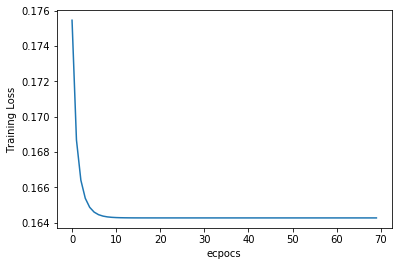

In [21]:
''' Plotting the training loss'''
plt.plot(train_loss_list)
plt.xlabel('ecpocs')
plt.ylabel('Training Loss')
plt.show()

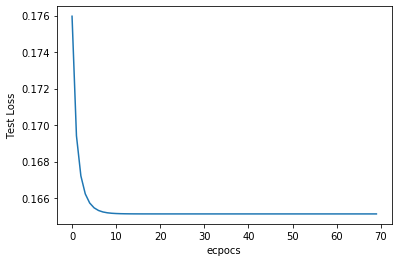

In [22]:
''' Plotting the test loss '''
plt.plot(test_loss_list)
plt.xlabel('ecpocs')
plt.ylabel('Test Loss')
plt.show()

In [23]:
print(w-clf.coef_)

[[-0.00638911  0.00754818  0.00012587 -0.00334066 -0.01304236  0.00976687
   0.00724119  0.00416717  0.01253169 -0.00703176  0.00167585 -0.00477865
  -0.00170698  0.00056628  0.00031129]]


In [24]:
def get_pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - get_pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - get_pred(w,b,X_test))/len(X_test))

0.95224
0.95
